In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [124]:
pd.options.display.float_format = '{:.4f}'.format 
# no scientific notation!

In [125]:
food_df_1 = pd.read_csv('../data/food-com/food_com_bulk_data/recipes.csv')
food_df_2 = pd.read_csv('../data/food-com/food_com_bulk_data/recipes_w_ing_qtys.csv')

In [126]:
food_df_1.shape

(522517, 28)

In [127]:
food_df_2.shape

(494963, 10)

In [129]:
food_df_2_ing = food_df_2[['id', 'ingredients_raw_str']]
food_df_2_ing.head()

,id,ingredients_raw_str
0,96313,"[""4 cups water"",""1 cup uncooked old fashion grits"",""1 teaspoon salt"",""4 ounces shredded cheddar cheese"",""1 -2 clove garlic, minced "",""1 tablespoon olive oil""]"
1,232037,"[""1 medium onion, chopped coarse "",""1 medium red bell pepper, chopped coarse "",""5 medium garlic cloves, chopped coarse "",""1 lb extra large shrimp, shelled and deveined "","" salt..."
2,41090,"[""1 cup canned white beans, rinsed and drained "",""1 cup canned black beans, rinsed and drained "",""1 large tomatoes, diced "",""1 small onion, diced "",""1 stalk celery, diced ""..."
3,60656,"[""2 zucchini, sliced "",""2 small yellow squash, sliced "",""2 -3 cans diced tomatoes"",""1 onion, chopped "",""4 cloves garlic, crushed "",""1 green bell pepper, chopped "",..."
4,232047,"[""3 lbs beef stew meat"",""3 tablespoons flour"",""1 teaspoon salt"",""1/2 teaspoon allspice"",""1/2 teaspoon cinnamon"",""1/2 teaspoon black pepper"",""1 tablespoon vegetable ..."


In [130]:
food_df_1.set_index('RecipeId', inplace=True)

In [131]:
food_df_2_ing.set_index('id', inplace = True)

In [132]:
food_df = food_df_1.join(food_df_2_ing, how='inner')

In [133]:
food_df[['Name', 'RecipeIngredientParts', 'ingredients_raw_str']]

,Name,RecipeIngredientParts,ingredients_raw_str
38,Low-Fat Berry Blue Frozen Dessert,"c(""blueberries"", ""granulated sugar"", ""vanilla yogurt"", ""lemon juice"")","[""4 cups blueberries, fresh or frozen "",""1/4 cup granulated sugar"",""1 cup vanilla yogurt, 1% or nonfat "",""1 tablespoon lemon juice""]"
39,Biryani,"c(""saffron"", ""milk"", ""hot green chili peppers"", ""onions"", ""garlic"", ""clove"", ""peppercorns"", ""cardamom seed"", ""cumin seed"", ""poppy seed"", ""mace"", ""cilantro"", ""mint leaf"", ""fresh lemon juice"", ""plai...","[""1 tablespoon saffron"",""4 teaspoons milk, warm "",""2 hot green chili peppers, as serranos -- seeded \u0026 stemmed "",""2 large onions, chopped "",""8 cloves garlic, peeled ""..."
40,Best Lemonade,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of"", ""fresh water"", ""fresh lemon juice"")","[""1 1/2 cups sugar"",""1 tablespoon lemons, rind of or 1 tablespoon lemon, zest of, finely grated (without any white rind)"","" to taste fresh water"",""1 1/2 cups fresh lemon jui..."
41,Carina's Tofu-Vegetable Kebabs,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""mushrooms"", ""soy sauce"", ""low sodium soy sauce"", ""olive oil"", ""maple syrup"", ""honey"", ""red wine vinegar"", ""lemon juice"", ""garlic cloves"", ""mustard pow...","[""12 ounces extra firm tofu, water-packed "",""1 medium eggplant"",""2 small zucchini"",""1 medium red pepper"",""10 ounces mushrooms"",""1 (5 1/2 ounce) can baby corn, drained ""..."
42,Cabbage Soup,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""carrots"", ""celery"")","[""46 ounces plain tomato juice"",""4 cups cabbage, shredded "",""1 medium onion, chopped "",""2 large carrots, cleaned skinned and shredded "",""1 cup celery, finely diced ""]"
...,...,...,...
537800,BBQ Chicken Flatbreads from 'Every Day Easy Air Fryer',"c(""barbecue sauce"", ""smoked gouda cheese"", ""mozzarella cheese"", ""red onion"", ""fresh cilantro"")","[""2 cups chopped cooked chicken"",""3/4 cup prepared barbecue sauce"",""2 prepared naan flat bread"",""1/2 cup shredded smoked gouda cheese"",""3/4 cup shredded mozzarella cheese"",""1/2 ..."
537801,Jalape&ntilde;o Popper Bake from 'Every Day Easy Air Fryer',"c(""chicken thighs"", ""bell pepper"", ""cream cheese"", ""chili powder"", ""kosher salt"", ""bacon"", ""scallion"", ""celery rib"", ""celery rib"", ""tortilla chips"")","["" vegetable oil, for greasing "",""1 1/2 lbs chicken thighs (boneless, skinless, diced)"",""1/2 cup diced bell pepper"",""1 -4 jalapeno, minced "",""2 ounces cream cheese, softened "",""..."
537802,Shrimp Scampi from 'Every Day Easy Air Fryer',"c(""salted butter"", ""ghee"", ""fresh lemon juice"", ""garlic"", ""red pepper flakes"", ""shrimp"", ""chicken broth"", ""dry white wine"", ""fresh basil"", ""dried basil"", ""fresh chives"", ""dried chives"")","[""4 tablespoons salted butter or 4 tablespoons ghee"",""1 tablespoon fresh lemon juice"",""1 tablespoon minced garlic"",""2 teaspoons red pepper flakes"",""1 lb shrimp, peeled..."
537803,Taco Chile Casserole from 'Every Day Easy Air Fryer',"c(""kosher salt"", ""eggs"", ""milk"", ""all-purpose flour"", ""mild green chilies"", ""kosher salt"")","["""",""1 lb 85% lean ground beef"",""1 tablespoon salt-free taco seasoning"",""1 teaspoon kosher salt"","" vegetable oil cooking spray"","""",""2 large eggs"",""1/2 cup milk"",""2 tables..."


In [134]:
food_df.dtypes

Name                           object
AuthorId                        int64
AuthorName                     object
CookTime                       object
PrepTime                       object
TotalTime                      object
DatePublished                  object
Description                    object
Images                         object
RecipeCategory                 object
Keywords                       object
RecipeIngredientQuantities     object
RecipeIngredientParts          object
AggregatedRating              float64
ReviewCount                   float64
Calories                      float64
FatContent                    float64
SaturatedFatContent           float64
CholesterolContent            float64
SodiumContent                 float64
CarbohydrateContent           float64
FiberContent                  float64
SugarContent                  float64
ProteinContent                float64
RecipeServings                float64
RecipeYield                    object
RecipeInstru

The following explains how high sodium and high protein per serving thresholds were reached. For protein, the value would stand as the threshold for a male - for females, it is lower. It would follow that a recipe whose protein per serving is unsuitable for males would also be unsuitable for females.

Locating recipes on food.com's live website confirmed that the following units are in use:
- All fat, protein: grams
- All sodium: milligrams

In [135]:
high_protein_threshold = (((200 / 2.2) # median weight of a male in the US converted to kg
* 0.6) # multiplied by the 0.6 g/ kg recommendation (low end) provided by (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5962279/)
/ 3) # divided by 3 as a generalized assumption that protein intake is largely divided across 3 meals a day

In [136]:
high_sodium_threshold = 2300 * 0.2 # value derived from the FDA recommendation that adults consume no more thant 2,300mg a day
#combined with kidney institute's designation of high sodium serving being > 20%
# https://www.fda.gov/food/nutrition-education-resources-materials/sodium-your-diet#:~:text=Americans%20eat%20on%20average%20about,recommended%20limits%20are%20even%20lower.
# See supporting documents folder on sodium intake sourced dfrom National Institute of Diabetes and Digestive and Kidney Diseases

In [137]:
high_satfat_threshold = (((2000 * 0.1) / # according to the AHA, guidelines advocate a limitation that calories from saturated fat should not exceed 10% of daily total caloric intake
                          9) # this report from the Institute of Medicine of the National Academies of Sciences, Engineering and Medicine finds that 1g provides 9 kcal
                         / 3) # this is a generalized assumption that sat fat instake is largely divided across 3 meals a day

In [138]:
food_df['high_sodium'] = np.where(food_df['SodiumContent'] > high_sodium_threshold, 1, 0)

In [139]:
food_df['high_protein'] = np.where(food_df['ProteinContent'] > high_protein_threshold, 1 , 0)

In [140]:
food_df['high_satfat'] = np.where(food_df['SaturatedFatContent'] > high_satfat_threshold, 1 , 0)

In [141]:
food_df.columns

Index(['Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'ingredients_raw_str', 'high_sodium', 'high_protein', 'high_satfat'],
      dtype='object')

### Exploratory visualizations

In [142]:
food_df[['SodiumContent', 'ProteinContent', 'SaturatedFatContent']].describe()

,SodiumContent,ProteinContent,SaturatedFatContent
count,494949.0000,494949.0000,494949.0000
mean,740.1425,17.8235,9.6735
std,3535.8126,40.4522,46.8779
min,0.0000,0.0000,0.0000
25%,131.3000,3.7000,1.6000
50%,360.8000,9.6000,4.8000
75%,796.3000,25.5000,10.9000
max,731056.4000,18396.2000,26740.6000


Text(0.5, 0, 'Sodium Content (mg)')

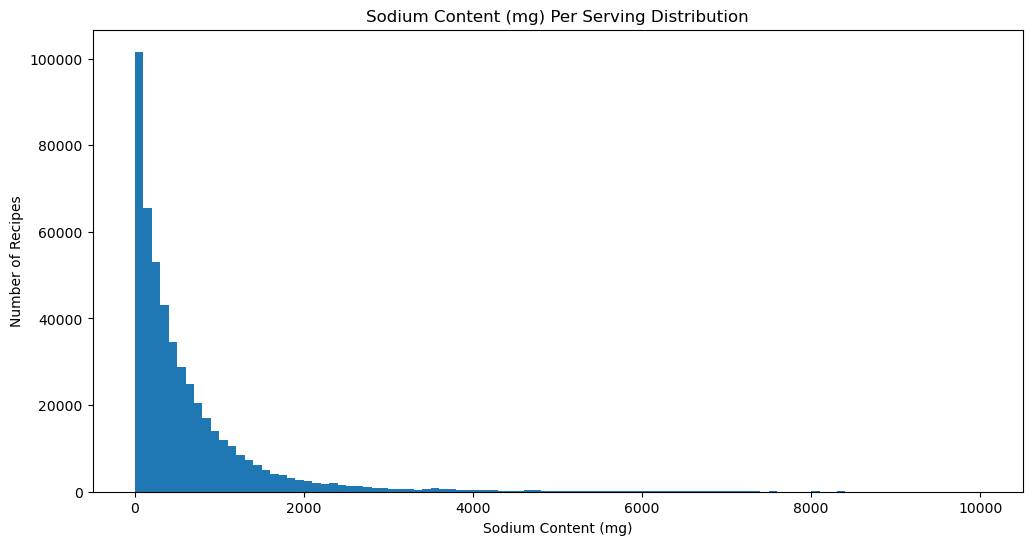

In [143]:

plt.figure(figsize=(12,6))
plt.hist(food_df[['SodiumContent']], bins = 100, range=(0, 10000))
plt.title('Sodium Content (mg) Per Serving Distribution')
plt.ylabel('Number of Recipes')
plt.xlabel('Sodium Content (mg)')


Text(0.5, 0, 'Saturated Fat Content (g)')

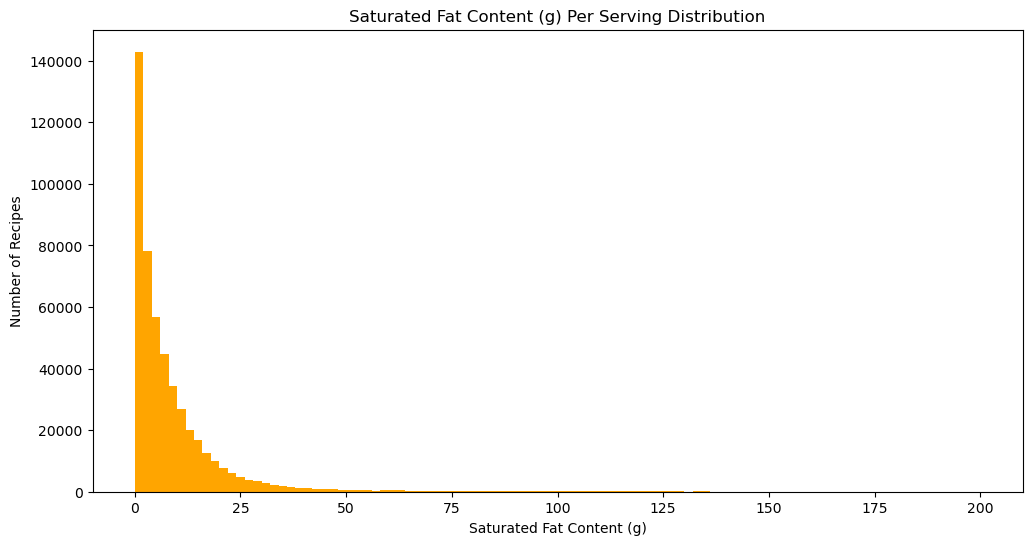

In [144]:
plt.figure(figsize=(12,6))
plt.hist(food_df[['SaturatedFatContent']], bins = 100, range=(0, 200), color = 'orange')
plt.title('Saturated Fat Content (g) Per Serving Distribution')
plt.ylabel('Number of Recipes')
plt.xlabel('Saturated Fat Content (g)')


Text(0.5, 0, 'Protrain Content (g)')

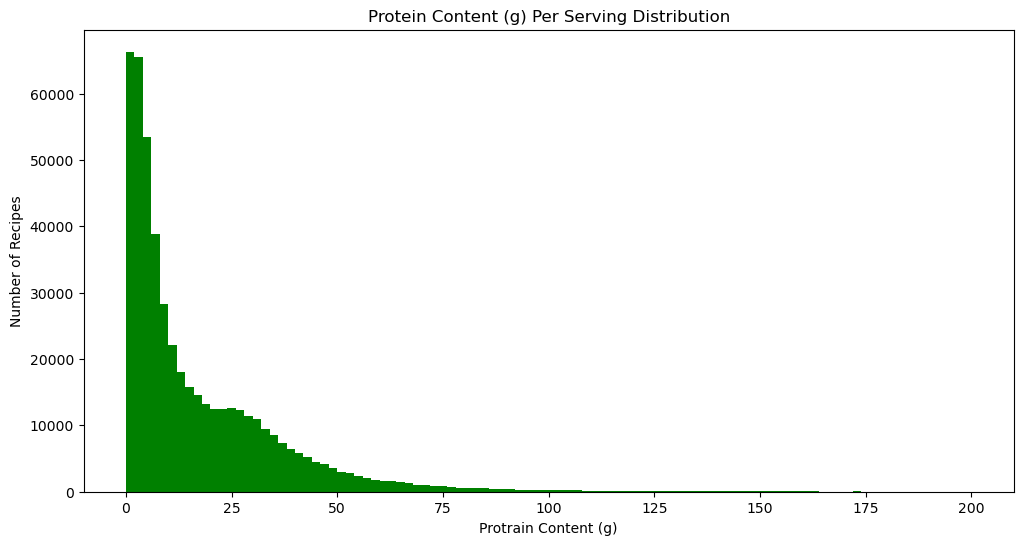

In [145]:
plt.figure(figsize=(12,6))
plt.hist(food_df[['ProteinContent']], bins = 100, range=(0, 200), color = 'green')
plt.title('Protein Content (g) Per Serving Distribution')
plt.ylabel('Number of Recipes')
plt.xlabel('Protrain Content (g)')


The above histograms show that the nutritional content of this dataset is not parametric. As such, I perform a log transform below and find z-scores to better identify outliers which will be omitted from the data later.

In [146]:
for col in ['SodiumContent', 'ProteinContent', 'SaturatedFatContent']:
    if col == 'SodiumContent':
        food_df[col] = np.where(food_df[col] == 0, 1, food_df[col])
    else:
        food_df[col] = np.where(food_df[col] == 0, 0.001, food_df[col])
    food_df[f"{col}_log"] = np.log(food_df[col])
    food_df[f"{col}_z"] = stats.zscore(food_df[f"{col}_log"])

[Text(0, 0, 'log(SodiumContent) Z Score'),
 Text(1, 0, 'log(SaturatedFatContent) Z Score'),
 Text(2, 0, 'log(ProteinContent) Z Score')]

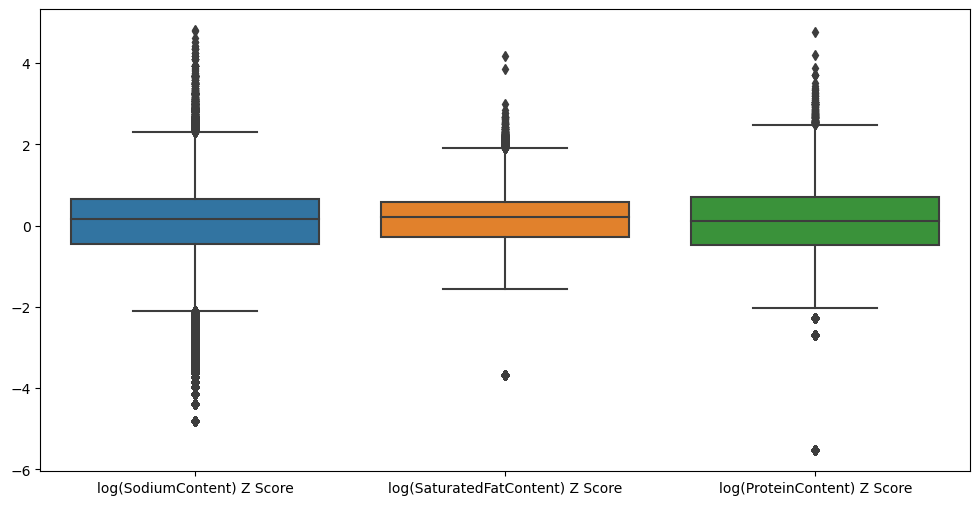

In [147]:
plt.figure(figsize=(12,6))
box = sns.boxplot(data= [food_df['SodiumContent_z'], food_df['SaturatedFatContent_z'], food_df['ProteinContent_z'] ])
box.set_xticklabels(['log(SodiumContent) Z Score', 'log(SaturatedFatContent) Z Score', 'log(ProteinContent) Z Score'])

In [148]:
sodium_mask_low = food_df['SodiumContent_z'] > -2
sodium_mask_high = food_df['SodiumContent_z'] < 2
satfat_mask_low = food_df['SaturatedFatContent_z'] > -1.5
satfat_mask_high = food_df['SaturatedFatContent_z'] < 1.5
protein_mask_low = food_df['ProteinContent_z'] > -2
protein_mask_high = food_df['ProteinContent_z'] < 2

In [149]:
food_NO_df = food_df[(sodium_mask_low) & (sodium_mask_high) & (satfat_mask_low) & (satfat_mask_high) & (protein_mask_low) & (protein_mask_high)].copy()
food_NO_df.shape

(439991, 37)

In [150]:
food_NO_df.dropna(subset=['SodiumContent', 'ProteinContent', 'SaturatedFatContent', 'RecipeServings', 'RecipeIngredientParts', 'RecipeIngredientQuantities'], inplace=True)

In [151]:
food_NO_df.shape

(289608, 37)

In [152]:
food_NO_df.columns

Index(['Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'ingredients_raw_str', 'high_sodium', 'high_protein', 'high_satfat',
       'SodiumContent_log', 'SodiumContent_z', 'ProteinContent_log',
       'ProteinContent_z', 'SaturatedFatContent_log', 'SaturatedFatContent_z'],
      dtype='object')

In [155]:
food_NO_df.sample(5)[['Name', 
                      'Description',
                      'SodiumContent',
                      'high_sodium',
                      'ProteinContent',
                      'high_protein',
                      'SaturatedFatContent',
                      'high_satfat',
                      'RecipeServings',
                      'ingredients_raw_str']]

,Name,Description,SodiumContent,high_sodium,ProteinContent,high_protein,SaturatedFatContent,high_satfat,RecipeServings,ingredients_raw_str
126290,Baked Chicken in Honey Barbecue Sauce,"A little on the sweet side but kids will love this dish. This is one of my moms recipes, so the cooking time is about an hour until chicken is cooked through and the chicken gets brownish from the...",639.4000,1,1.9000,0,0.2000,0,6.0000,"[""6 chicken pieces (I use skinless boneless)"",""1 (455 ml) bottle kraft original barbecue sauce"",""1 (19 ounce) can pineapple chunks"",""1 teaspoon ground ginger"",""1/2 cup honey""..."
443254,Special Rhubarb Cake,This recipe came from a friend who got it from an old lady who was famous for it at her church functions.,290.7000,0,4.6000,0,3.3000,0,10.0000,"["""",""2 tablespoons butter, softened "",""1 cup sugar"",""1 egg"",""2 cups all-purpose flour"",""1 teaspoon baking powder"",""1/2 teaspoon baking soda"",""1/2 teaspoon salt"",""..."
129060,Louisiana Shrimp Stew,Make and share this Louisiana Shrimp Stew recipe from Food.com.,361.9000,0,24.9000,1,1.3000,0,8.0000,"[""2 tablespoons flour"",""1 tablespoon butter"",""1 cup onion, chopped "",""1 bunch green onion, chopped "",""4 garlic cloves, chopped "",""3/4 cup celery, chopped "",""1/3 cup ..."
438645,"Tagliatelle With Squash, Chili &amp; Ricotta","Make and share this Tagliatelle With Squash, Chili &amp; Ricotta recipe from Food.com.",42.9000,0,14.3000,0,2.1000,0,2.0000,"[""10 1/2 ounces butternut squash, peeled and cut into small dice "",""1 pinch chili flakes"",""4 garlic cloves, finely chopped "",""5 ounces tagliatelle pasta"",""1 1/2 ounces flat-l..."
254267,1950's Brownies,This batter is very thick but bakes up to a YUM YUM chewy brownie that you will want to eat the whole pan. I usually double this recipe,122.2000,0,2.4000,0,2.5000,0,16.0000,"[""1 unsweetened chocolate square"",""1 semisweet baking chocolate square"",""1/3 cup shortening"",""1 cup sugar"",""2 eggs"",""3/4 cup sifted flour"",""1/2 teaspoon baking po..."


In [156]:
high_sodium = food_NO_df['high_sodium'] == 1
high_protein = food_NO_df['high_protein'] == 1
high_satfat = food_NO_df['high_satfat'] == 1

In [157]:
nkf_recipes = food_NO_df[(high_sodium) | (high_protein) | (high_satfat)]

In [158]:
nkf_recipes.shape

(185848, 37)

In [160]:
nkf_recipes.sample(5)[['Name', 
                      'Description',
                      'SodiumContent',
                      'high_sodium',
                      'ProteinContent',
                      'high_protein',
                      'SaturatedFatContent',
                      'high_satfat',
                      'RecipeServings',
                      'ingredients_raw_str']]

,Name,Description,SodiumContent,high_sodium,ProteinContent,high_protein,SaturatedFatContent,high_satfat,RecipeServings,ingredients_raw_str
452925,Hungarian Pork and Lentil Stew,Make and share this Hungarian Pork and Lentil Stew recipe from Food.com.,316.8000,0,22.3000,1,2.1000,0,6.0000,"[""1 tablespoon olive oil"",""2 onions, chopped "",""500 g lean pork, diced "",""2 teaspoons sweet Hungarian paprika"",""1 teaspoon hot paprika"",""60 g red lentils"",""1/2 teas..."
220222,Chorizo - a Healthy Version?,"I have always loved the flavor of chorizo, but seldom ate it due to all the fat in it. In 2004 I purchased a simple electric meat grinder and started making my own sausages. Now I know WHAT is in ...",683.6000,1,19.8000,1,9.0000,1,4.0000,"[""1 lb ground lean pork"",""2 tablespoons chili powder"",""1/2 teaspoon Mexican oregano"",""1 teaspoon salt"",""1/4 teaspoon cumin"",""2 garlic cloves, minced "",""2 tablespoons..."
40458,Enchilada Chicken Soup,"I share with you the easiest soup ever. I make this when I need something to put on the table fast! My hubby calls this my &quot;cheaters soup&quot;, but he admits he loves it!",844.5000,1,16.9000,0,3.5000,0,6.0000,"[""1 (10 1/2 ounce) can Fiesta nacho cheese soup"",""1 (10 1/2 ounce) can cream of chicken soup"",""2 2/3 cups milk"",""1 (10 ounce) can chunky white chicken meat, drained "",""1 (10 ounce) ..."
59117,Cream of Shrimp Soup,"This is a delicious soup that can be served as a first course, main dish or even lunch. Even though it has a some cream, it only averages out to 2 T per person. So, it isn't that rich! Other shell...",599.3000,1,20.7000,1,9.3000,1,6.0000,"[""2 tablespoons olive oil"",""1 lb medium raw shrimp, peeled,deveined,shells reserved "",""4 cups fish stock or 4 cups bottled clam juice"",""1 cup dry white vermouth"",""1 ..."
323835,Yakitori Kebabs With Chicken and Vegetables,"Tasty and low fat kebabs. If you are short of time, marinate the chicken for just 20 minutes - it will still absorb a lot of the flavours. Try using a different selection of vegetables, such as ye...",1119.3000,1,25.5000,1,0.3000,0,4.0000,"[""4 tablespoons soy sauce"",""2 tablespoons mirin"",""1 tablespoon clear honey"",""1 inch piece gingerroot, peeled and finely grated "",""1 garlic clove, crushed "",""14 ounces ..."


In [161]:
nkf_recipes.to_csv('../data/generated/non_kidney_friendly_recipes.csv', index=True)

In [162]:
very_nkf_recipes = food_NO_df[(high_sodium) & (high_protein) & (high_satfat)]

In [163]:
very_nkf_recipes.shape

(43451, 37)